# **Tugas Praktikum**

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

> Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

> Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

> Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

# **Jawaban Tugas Praktikum**

**Langkah 1: Persiapan Data**

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

**Langkah 2: Import Library:**

In [17]:
# Import package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Langkah 3: Baca Data**

In [18]:
# Baca data dari file CSV
data = pd.read_csv('data/insurance.csv')

**Langkah 4: Pemahaman Terhadap Data**

In [19]:
# Melihat beberapa data awal
data.head()

# Mengecek ukuran data
data.shape

# Informasi tentang data
data.info()

# Deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

    **Jawab:**

    **> Variabel Bebas:** Fitur yang akan digunakan untuk memprediksi
        age

        sex

        bmi

        children

        smoker

        region

    **> Variabel Target:** Variabel yang menjadi target prediksi

        charges



2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

    **Jawab:**

In [20]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data[['age', 'bmi', 'children']] # Kolom fitur
y = data['charges'] # Kolom target

# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("Jumlah data latih: ", len(X_train))
print("Jumlah data uji: ", len(X_test))

Jumlah data latih:  936
Jumlah data uji:  402


c:\Users\astrd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


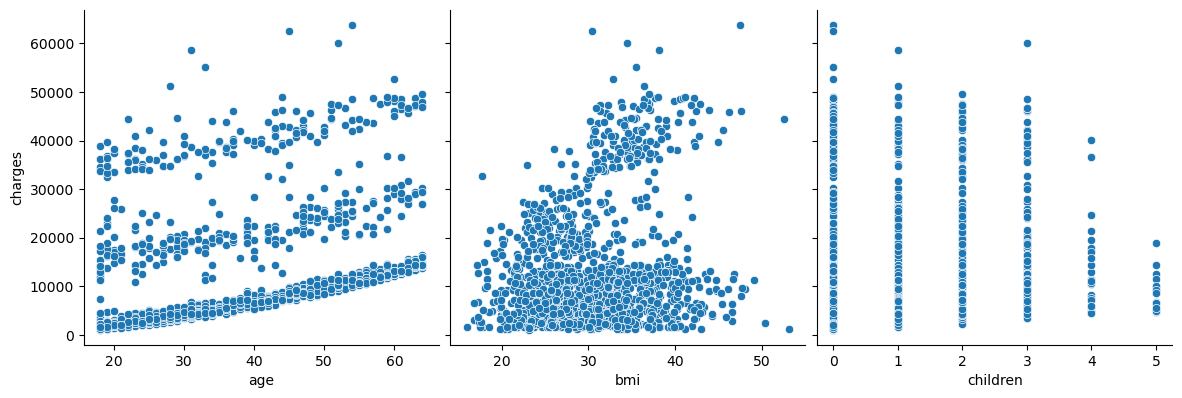

In [21]:
# Visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi','children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

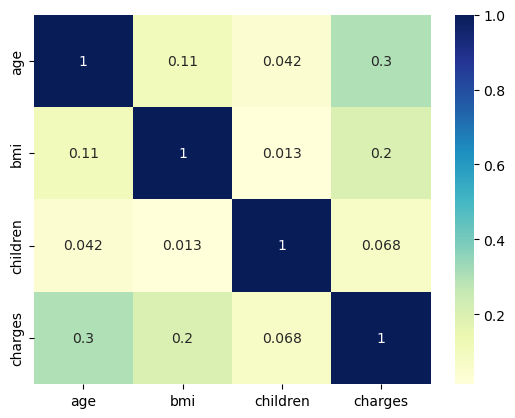

In [22]:
# Visualisasi korelasi dengan heatmap
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot = True)
plt.show()

3. Lakukan feature scaling jika diperlukan.

    **Jawab:**

In [23]:
# Feature scaling.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

    **Jawab:**

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

    **Jawab:**

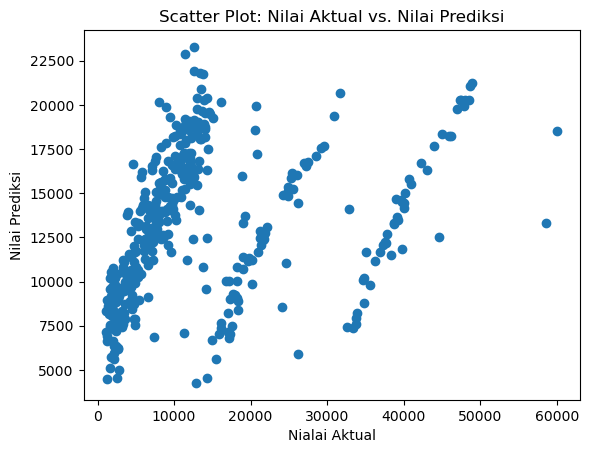

In [25]:
#Training Model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
Y_test_pred = lr.predict(X_test_sm)

plt.scatter(y_test, Y_test_pred)
plt.xlabel("Nialai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Scatter Plot: Nilai Aktual vs. Nilai Prediksi")
plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

    **Jawab:**

In [26]:
#Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hitung nilai R-squad
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, Y_test_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, Y_test_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, Y_test_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 8899.594165897634
MSE: 129209552.77458598
RMSE: 11367.037994771812
R-squared: 0.11011288902870364
